# 1.Importando bibliotecas

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2.Importando nossos dados

In [21]:
arq=pd.read_excel(r"C:\Users\Andrey\Downloads\Portifólio\Risco_credito\Credito_alemanha.xlsx")

arq

,Idade,Sexo,Empregado,Moradia,Contas poupanças,conta corrente,Valor do crédito,Duração,Propósito
0,67,masculino,2,própria,NaN,pouco,1169,6,rádio/TV
1,22,feminino,2,própria,pouco,moderado,5951,48,rádio/TV
2,49,masculino,1,própria,pouco,NaN,2096,12,educação
3,45,masculino,2,gratuita,pouco,pouco,7882,42,mobília/equipamento
4,53,masculino,2,gratuita,pouco,pouco,4870,24,carro
...,...,...,...,...,...,...,...,...,...
995,31,feminino,1,própria,pouco,NaN,1736,12,mobília/equipamento
996,40,masculino,3,própria,pouco,pouco,3857,30,carro
997,38,masculino,2,própria,pouco,NaN,804,12,rádio/TV
998,23,masculino,2,gratuita,pouco,pouco,1845,45,rádio/TV


In [22]:
#Caso queira saber um pouco mais sobre cada dado
arq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Idade             1000 non-null   int64 
 1   Sexo              1000 non-null   object
 2   Empregado         1000 non-null   int64 
 3   Moradia           1000 non-null   object
 4   Contas poupanças  817 non-null    object
 5   conta corrente    606 non-null    object
 6   Valor do crédito  1000 non-null   int64 
 7   Duração           1000 non-null   int64 
 8   Propósito         1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [23]:
#vendo se temos valores nulos nas colunas
arq.isna().sum()

Idade                 0
Sexo                  0
Empregado             0
Moradia               0
Contas poupanças    183
conta corrente      394
Valor do crédito      0
Duração               0
Propósito             0
dtype: int64

In [24]:
#Vemos que apenas contas popanças e contas correntes possuem valores nulo, mas isso tudo bem, pode ser que o cliente não possua deterterminado tipo de conta

#Mas vamos tirar esse Nan

# Caso 1: preencher com 'nenhuma' se a pessoa não possuir conta corrente ou conta poupança
arq['conta corrente'] = arq['conta corrente'].fillna('sem conta corrente')
arq['Contas poupanças'] = arq['Contas poupanças'].fillna('sem conta poupança')

# Caso 2: criar flag binária para quem tem ambas as contas como 'nenhuma'
arq['sem_contas'] = ((arq['conta corrente'] == 'nenhuma') & (arq['Contas poupanças'] == 'nenhuma')).astype(int)

In [25]:
#Analisando se temos valores duplicados
arq.duplicated().sum()

0

In [26]:
#Como nosse resultado na linha anterior é zero, não temos valores duplicados

In [27]:
#Analisando se temos outliers
arq.describe()

,Idade,Empregado,Valor do crédito,Duração,sem_contas
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,35.546000,1.904000,3271.258000,20.903000,0.0
std,11.375469,0.653614,2822.736876,12.058814,0.0
min,19.000000,0.000000,250.000000,4.000000,0.0
25%,27.000000,2.000000,1365.500000,12.000000,0.0
50%,33.000000,2.000000,2319.500000,18.000000,0.0
75%,42.000000,2.000000,3972.250000,24.000000,0.0
max,75.000000,3.000000,18424.000000,72.000000,0.0


In [28]:
#Vemos que todas as colunas possuem valores aceitaveis, ou seja essa planilha é bem idealizada.

# 3. Análise exploratória

## 3.1 Vendo quais as maiores propósitos para solicitação de crédito

In [29]:
#vendo a média que temos do Valor de credito em cada propósito
arq.groupby('Propósito')['Valor do crédito'].mean()

Propósito
carro                  3768.192878
educação               2879.203390
eletrodomesticos       1498.000000
mobília/equipamento    3066.988950
negócios               4158.041237
reparos                2728.090909
rádio/TV               2487.653571
viagem/outros          8209.333333
Name: Valor do crédito, dtype: float64

In [30]:
#para diminuirmos as casas decimais
media_credito=arq.groupby('Propósito')['Valor do crédito'].mean().round(1)
media_credito

Propósito
carro                  3768.2
educação               2879.2
eletrodomesticos       1498.0
mobília/equipamento    3067.0
negócios               4158.0
reparos                2728.1
rádio/TV               2487.7
viagem/outros          8209.3
Name: Valor do crédito, dtype: float64

In [31]:
#trocando esse titulo de valor credito para media valor credito
media_credito=(arq.groupby('Propósito')['Valor do crédito'].mean().round(1).reset_index().rename(columns={'Valor do crédito':'Média valor crédito'}))
media_credito

,Propósito,Média valor crédito
0,carro,3768.2
1,educação,2879.2
2,eletrodomesticos,1498.0
3,mobília/equipamento,3067.0
4,negócios,4158.0
5,reparos,2728.1
6,rádio/TV,2487.7
7,viagem/outros,8209.3


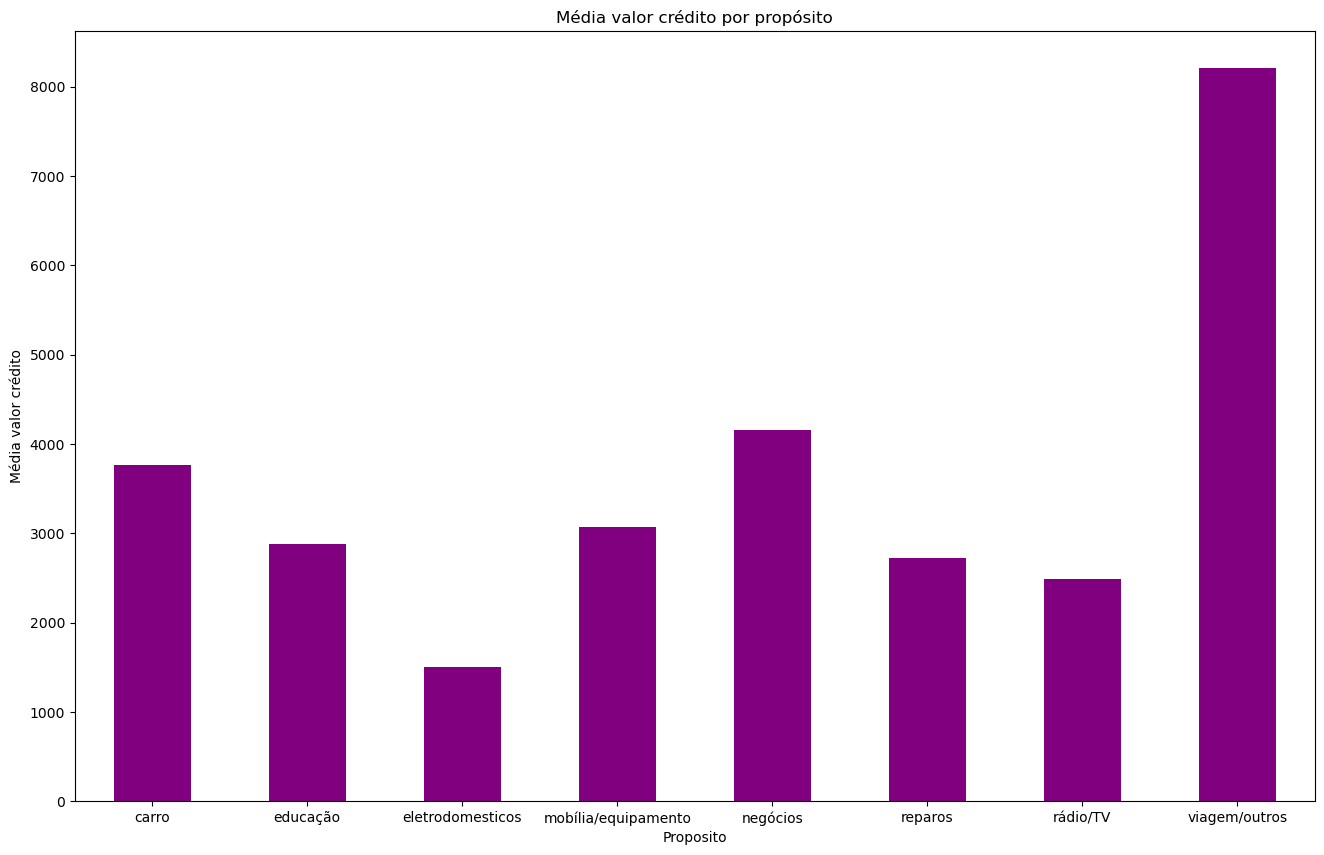

In [32]:
#Para uma visão gráfica
media_credito.set_index('Propósito').plot(kind='bar', figsize=(16, 10), color='purple', legend=False)
plt.title('Média valor crédito por propósito')
plt.xlabel('Proposito')
plt.ylabel('Média valor crédito')
plt.xticks(rotation=0)
plt.show()

In [33]:
#Aqui conseguimos ver de forma mais clara que em média a maior causa de emprétimos foi para viagens e outros.

In [34]:
#Caso não quisessemos ver a média, poderiamos ver a somas do crédito
soma_credito=(arq.groupby('Propósito')['Valor do crédito'].sum().round(1).reset_index().rename(columns={'Valor do crédito':'Valor crédito'}))
soma_credito

,Propósito,Valor crédito
0,carro,1269881
1,educação,169873
2,eletrodomesticos,17976
3,mobília/equipamento,555125
4,negócios,403330
5,reparos,60018
6,rádio/TV,696543
7,viagem/outros,98512


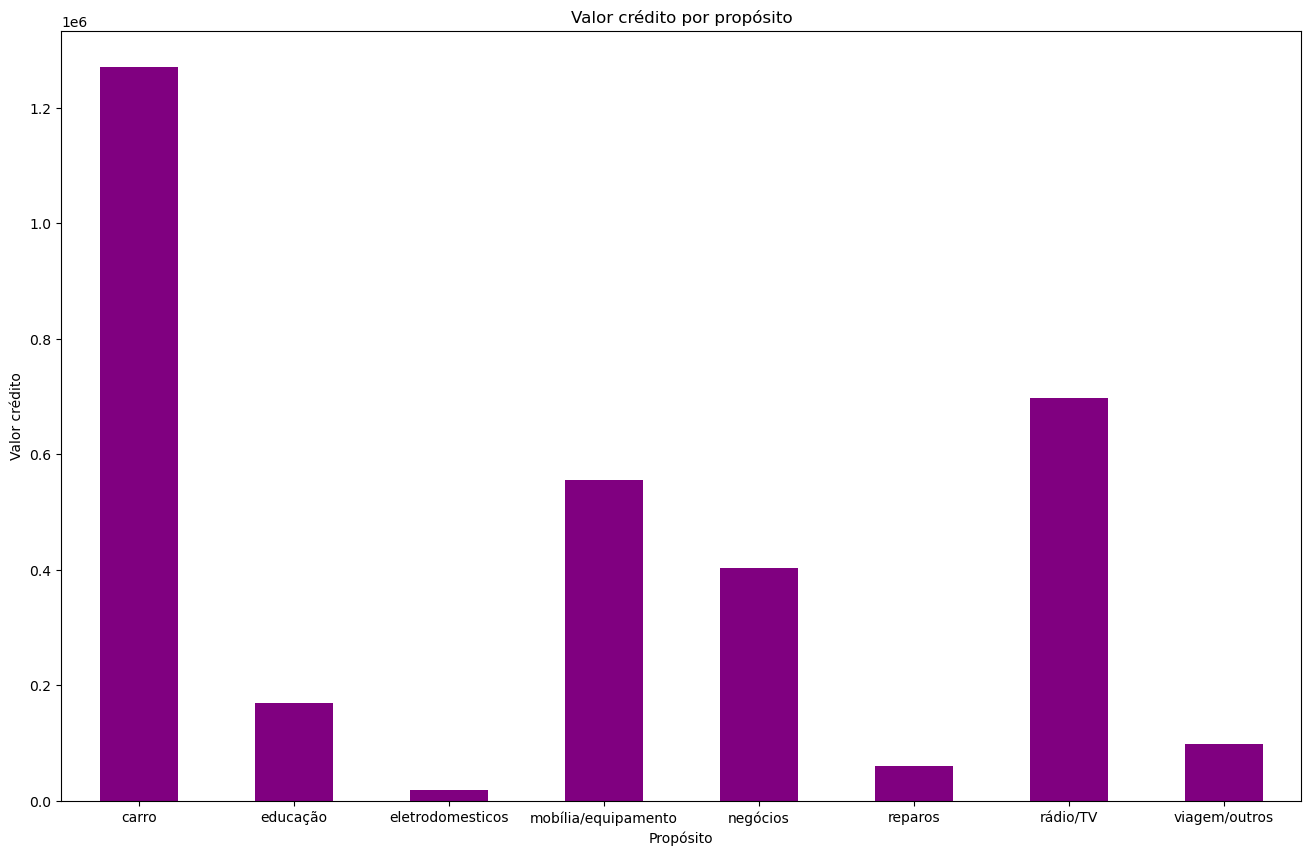

In [35]:
#para o gráfico disso
soma_credito.set_index('Propósito').plot(kind='bar', figsize=(16, 10), color='purple', legend=False)
plt.title('Valor crédito por propósito')
plt.xlabel('Propósito')
plt.ylabel('Valor crédito')
plt.xticks(rotation=0)
plt.show()

## 3.2 Fazendo uma analise do emprestimo com variáveis categóricas

## Fazendo uma analise do emprestimo em relalação ao sexo do cliente

In [ ]:
#Apenas por motivos de prática, aqui usarei a biblioteca plotly, para termos contato com gráficos mais interativos

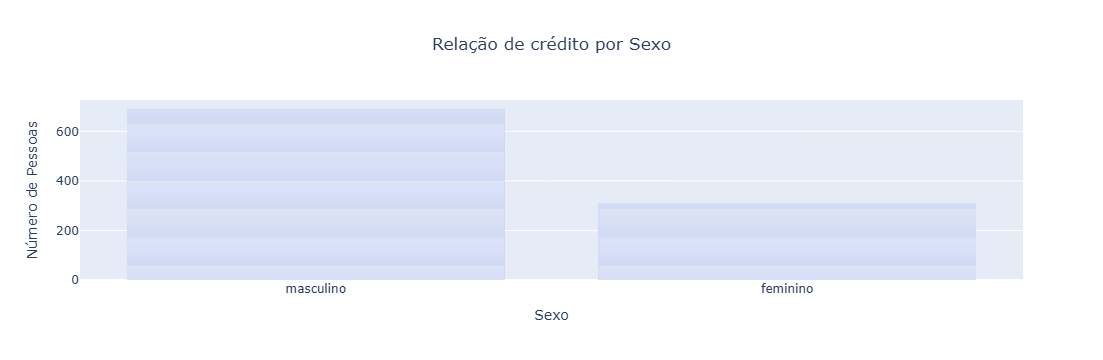

In [58]:
#Gráfico relacionando crédito por sexo
fig_sexo=px.bar(arq, x='Sexo',labels={'count': 'Número de Pessoas'},title='Relação de crédito por Sexo')
# Centralizar título
fig_sexo.update_layout(title_x=0.5)


In [49]:
#Ou seja, temos um numero muito maior do sexo masculino solicitando crédito do que o sexo feminino

## Fazendo uma analise do emprestimo em relalação ao tipo de moradia do cliente

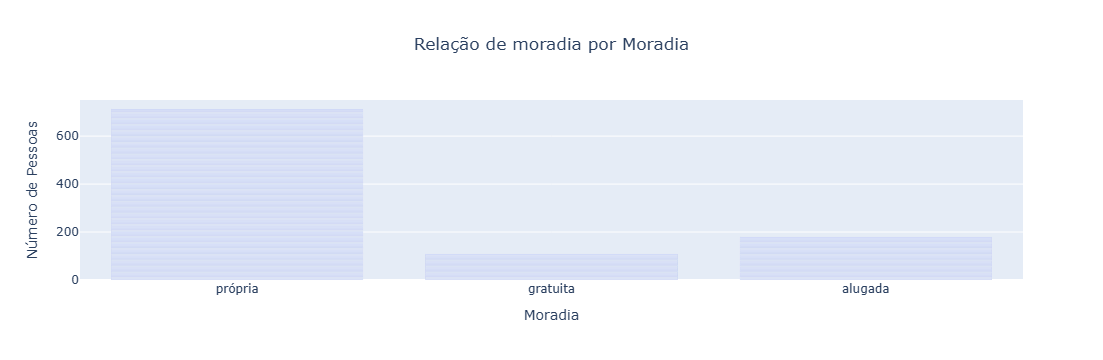

In [61]:
#Gráfico relacionando crédito por Moradia
fig_sexo=px.bar(arq, x='Moradia',labels={'count': 'Número de Pessoas'},title='Relação de moradia por Moradia')
# Centralizar título
fig_sexo.update_layout(title_x=0.5)


In [51]:
#Podemos ver que pessoas com casa própria possuem mais crédito

# 3.3 Tratamento de variáveis númericas

## 4 nalisando quando temos maior risco

In [25]:
#Temos como principais análises para riscos de crédito
# Valor do crédito
print("Valor do crédito")
print(arq["Valor do crédito"].describe(percentiles=[0.25, 0.5, 0.75]).round(1))

# Duração
print("\nDuração")
print(arq["Duração"].describe(percentiles=[0.25, 0.5, 0.75]).round(1))

# Idade
print("\nIdade")
print(arq["Idade"].describe(percentiles=[0.25, 0.5, 0.75]).round(1))

# Empregado
print("\nEmpregado")
print(arq["Empregado"].describe(percentiles=[0.25, 0.5, 0.75]).round(1))

Valor do crédito
count     1000.0
mean      3271.3
std       2822.7
min        250.0
25%       1365.5
50%       2319.5
75%       3972.2
max      18424.0
Name: Valor do crédito, dtype: float64

Duração
count    1000.0
mean       20.9
std        12.1
min         4.0
25%        12.0
50%        18.0
75%        24.0
max        72.0
Name: Duração, dtype: float64

Idade
count    1000.0
mean       35.5
std        11.4
min        19.0
25%        27.0
50%        33.0
75%        42.0
max        75.0
Name: Idade, dtype: float64

Empregado
count    1000.0
mean        1.9
std         0.7
min         0.0
25%         2.0
50%         2.0
75%         2.0
max         3.0
Name: Empregado, dtype: float64
